In [97]:
import rasterio
import random
import matplotlib.pyplot as plt
import torchvision.transforms as Trans
import torchvision.transforms.functional as TransF

In [98]:
ex_img02 = 'J:/CloudCover/data/data/train_features/pbyl/B02.tif'
ex_img03 = 'J:/CloudCover/data/data/train_features/pbyl/B03.tif'
ex_img04 = 'J:/CloudCover/data/data/train_features/pbyl/B04.tif'
ex_img08 = 'J:/CloudCover/data/data/train_features/pbyl/B08.tif'

bands = [ex_img02, ex_img03, ex_img04, ex_img08]

In [103]:
band_arrs = []
for band in bands:
    with rasterio.open(band) as b:
        band_arr = b.read(1).astype("float32")
    band_arrs.append(band_arr)
x_arr = np.stack(band_arrs, axis=-1)
# x_arr = np.transpose(x_arr, [2, 0, 1])
x_arr.shape

(512, 512, 4)

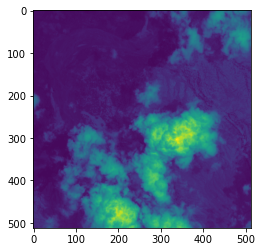

In [102]:
plt.imshow(x_arr[0])

In [104]:
x_arr_tensor = Trans.ToTensor()(x_arr)
x_arr_tensor.shape

torch.Size([4, 512, 512])

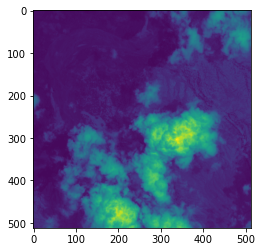

In [105]:
plt.imshow(x_arr_tensor[0])

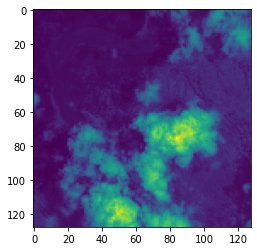

In [106]:
# 1. Уменьшаем размер
x_arr_transform1 = Trans.Resize((128,128))(x_arr_tensor)
plt.imshow(x_arr_transform1[0])

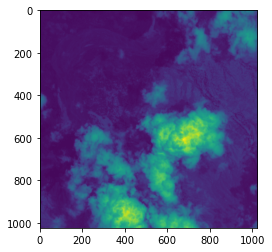

In [108]:
# 2. Увеличиваем размер
x_arr_transform2 = Trans.Resize((1024,1024))(x_arr_tensor)
plt.imshow(x_arr_transform2[0])

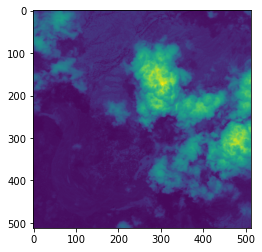

In [109]:
# 3. Поворот на 90 градусов
x_arr_transform3 = TransF.rotate(x_arr_tensor, 90)
plt.imshow(x_arr_transform3[0])

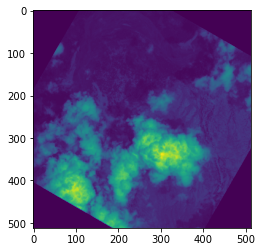

In [110]:
# 4. Случайный поворот (свой класс)
class MyRotationTransform:
    """Rotate by one of the given angles."""
    def __init__(self, angles):
        self.angles = angles
    def __call__(self, x):
        angle = random.choice(self.angles)
        return TransF.rotate(x, angle)

rotation_transform = MyRotationTransform(angles=[-30, -15, 0, 15, 30])

x_arr_transform4 = rotation_transform(x_arr_tensor)
plt.imshow(x_arr_transform4[0])

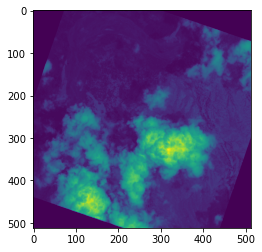

In [111]:
# 5. Случайный поворот тв
x_arr_transform5 = Trans.RandomRotation((-30, 30))(x_arr_tensor)
plt.imshow(x_arr_transform5[0])

In [152]:
# !pip install albumentations
import albumentations as A

band_arrs = []
for band in bands:
    with rasterio.open(band) as b:
        band_arr = b.read(1).astype("float32")
    band_arrs.append(band_arr)
x_arr = np.stack(band_arrs, axis=-1)


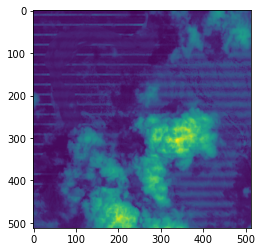

In [147]:
# не работает
a1 = A.Rotate(limit=(-15, 15))
x_arr_transform6 = a1(image=x_arr)["image"]
plt.imshow(x_arr_transform6[0])

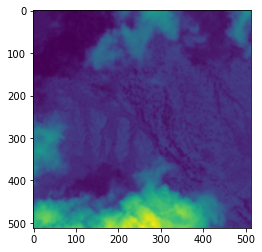

In [154]:
a1 = A.RandomSizedCrop((128,256), 512,512)
x_arr_transform6 = a1(image=x_arr)["image"]
x_arr_transform6 = np.transpose(x_arr_transform6, [2, 0, 1])
plt.imshow(x_arr_transform6[0])

In [3]:
with rasterio.open(ex_img02) as img:
    img_array02 = img.read(1)

with rasterio.open(ex_img03) as img:
    img_array03 = img.read(1)

with rasterio.open(ex_img04) as img:
    img_array04 = img.read(1)

with rasterio.open(ex_img08) as img:
    img_array08 = img.read(1)    

In [4]:
img_array02

array([[ 578,  594,  587, ..., 3296, 3188, 3220],
       [ 593,  589,  607, ..., 3238, 3212, 3348],
       [ 621,  577,  586, ..., 3252, 3266, 3438],
       ...,
       [ 776, 1372, 1628, ..., 3704, 3628, 3422],
       [1016, 1394, 1456, ..., 3746, 3702, 3460],
       [1366, 1288, 1478, ..., 3864, 3814, 3730]], dtype=uint16)

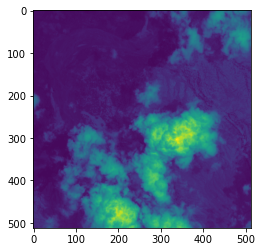

In [5]:
plt.imshow(img_array02)

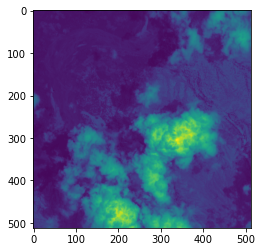

In [6]:
plt.imshow(img_array03)

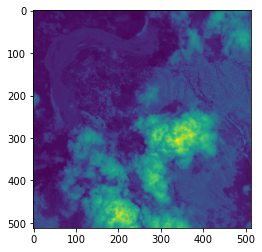

In [7]:
plt.imshow(img_array04)

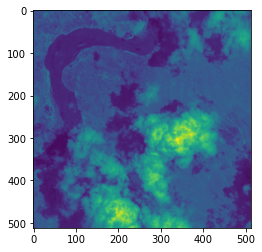

In [8]:
plt.imshow(img_array08)

In [9]:
# размер одной картинки 2 мб
# батч по 32 картинки требует 64 мб

In [10]:
# преобразование к цвету - но оно нужно только для изображения, для нейросети - не важно
# есть вариант - преобразование к HSV
import xarray
import numpy as np
from PIL import Image
import xrspatial.multispectral as ms

def get_xarray(filepath):
    """Put images in xarray.DataArray format"""
    im_arr = np.array(Image.open(filepath))
    return xarray.DataArray(im_arr, dims=["y", "x"])

red = get_xarray(ex_img04)
green = get_xarray(ex_img03)
blue = get_xarray(ex_img02)
ms1 = ms.true_color(r=red, g=green, b=blue)

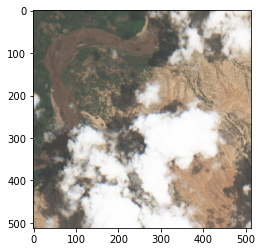

In [11]:
plt.imshow(ms1)

In [12]:
ms1

<xarray.DataArray 'true_color' (y: 512, x: 512, band: 4)>
array([[[ 74,  84,  75, 255],
        [ 74,  86,  75, 255],
        [ 75,  87,  75, 255],
        ...,
        [201, 191, 181, 255],
        [198, 189, 177, 255],
        [197, 188, 178, 255]],

       [[ 75,  85,  75, 255],
        [ 75,  85,  75, 255],
        [ 76,  87,  76, 255],
        ...,
        [199, 190, 179, 255],
        [196, 187, 178, 255],
        [196, 188, 183, 255]],

       [[ 76,  85,  76, 255],
        [ 74,  84,  75, 255],
        [ 73,  84,  75, 255],
        ...,
...
        ...,
        [211, 202, 194, 255],
        [199, 196, 192, 255],
        [190, 189, 185, 255]],

       [[120, 107,  91, 255],
        [134, 121, 106, 255],
        [162, 133, 108, 255],
        ...,
        [213, 204, 195, 255],
        [208, 201, 194, 255],
        [203, 194, 186, 255]],

       [[126, 118, 104, 255],
        [139, 125, 101, 255],
        [149, 126, 109, 255],
        ...,
        [214, 204, 199, 255],
        [211, 201, 197, 255],
        [205, 197, 195, 255]]], dtype=uint8)
Coordinates:
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 503 504 505 506 507 508 509 510 511
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 503 504 505 506 507 508 509 510 511
  * band     (band) int32 0 1 2 3

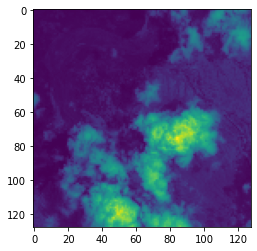

In [13]:
# в архив рецептов - загрузка и трансформация 
from PIL import Image
import torch

from torchvision import transforms
from torchvision.transforms import ToTensor, ToPILImage
image = Image.open('J:/CloudCover/data/data/train_features/pbyl/B02.tif')
image = ToTensor()(image)

prep = transforms.Compose([
    transforms.Resize((128,128))
    ])

x = prep(image)
plt.imshow(ToPILImage()(x))

In [14]:
import os
from pathlib import Path
from typing import List
from loguru import logger
import pandas as pd
from PIL import Image
import torch
import typer
from cloud_dataset import CloudDataset

bands = ["B02", "B03", "B04", "B08"]
DATA_DIR = Path.cwd().parent.resolve() / "CloudCover/data"
TRAIN_FEATURES = DATA_DIR / "data/train_features"

def get_metadata(features_dir: os.PathLike, bands: List[str]):
    """
    Given a folder of feature data, return a dataframe where the index is the chip id
    and there is a column for the path to each band's TIF image.

    Args:
        features_dir (os.PathLike): path to the directory of feature data, which should have
            a folder for each chip
        bands (list[str]): list of bands provided for each chip
    """
    chip_metadata = pd.DataFrame(index=[f"{band}_path" for band in bands])
    chip_ids = (
        pth.name for pth in features_dir.iterdir() if not pth.name.startswith(".")
    )

    for chip_id in chip_ids:
        chip_bands = [features_dir / chip_id / f"{band}.tif" for band in bands]
        chip_metadata[chip_id] = chip_bands

    return chip_metadata.transpose().reset_index().rename(columns={"index": "chip_id"})

In [15]:
train_metadata = get_metadata(TRAIN_FEATURES, bands=bands)
print(train_metadata.shape)
train_metadata.head()

(11748, 5)


,chip_id,B02_path,B03_path,B04_path,B08_path
0,adwp,J:\CloudCover\data\data\train_features\adwp\B0...,J:\CloudCover\data\data\train_features\adwp\B0...,J:\CloudCover\data\data\train_features\adwp\B0...,J:\CloudCover\data\data\train_features\adwp\B0...
1,adwu,J:\CloudCover\data\data\train_features\adwu\B0...,J:\CloudCover\data\data\train_features\adwu\B0...,J:\CloudCover\data\data\train_features\adwu\B0...,J:\CloudCover\data\data\train_features\adwu\B0...
2,adwz,J:\CloudCover\data\data\train_features\adwz\B0...,J:\CloudCover\data\data\train_features\adwz\B0...,J:\CloudCover\data\data\train_features\adwz\B0...,J:\CloudCover\data\data\train_features\adwz\B0...
3,adxp,J:\CloudCover\data\data\train_features\adxp\B0...,J:\CloudCover\data\data\train_features\adxp\B0...,J:\CloudCover\data\data\train_features\adxp\B0...,J:\CloudCover\data\data\train_features\adxp\B0...
4,aeaj,J:\CloudCover\data\data\train_features\aeaj\B0...,J:\CloudCover\data\data\train_features\aeaj\B0...,J:\CloudCover\data\data\train_features\aeaj\B0...,J:\CloudCover\data\data\train_features\aeaj\B0...


In [16]:
p = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((256,256))
    ])

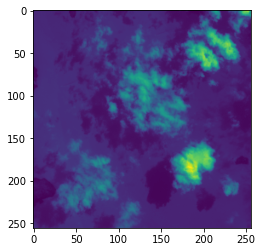

In [17]:
train_dataset = CloudDataset(x_paths=train_metadata, bands=bands, transforms=p)
img0 = train_dataset.__getitem__(0)["chip"]
plt.imshow(img0[0])